In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from tqdm import tqdm

In [9]:
state_dataset = pd.read_csv("datasets/preprocessed_counties_data.csv")
heading_dataset = pd.read_csv("datasets/stateID.csv", index_col=0)
heading = heading_dataset.to_dict()
def get_key(val, dict):
    for key, value in dict.items():
        if val == value:
            return key
    return "key doesn't exist"

In [50]:
x = state_dataset[['type', 'flavor', 'state', 'year']]
y = state_dataset['index']
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_features = poly.transform(x)
clf = LinearRegression()
clf.fit(poly_features, y)

LinearRegression()

 37%|███▋      | 19/51 [00:02<00:03,  9.53it/s]/var/folders/kx/dd0tmbz95_n461n7xxtqy1wm0000gn/T/ipykernel_3180/3693250814.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=(7, 4))
100%|██████████| 51/51 [00:05<00:00,  9.59it/s]


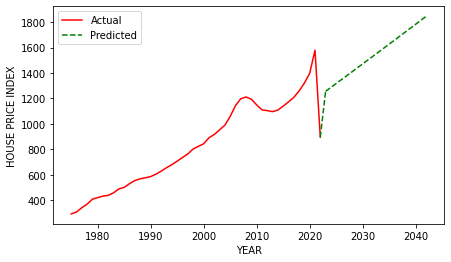

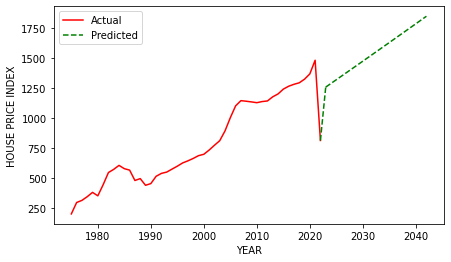

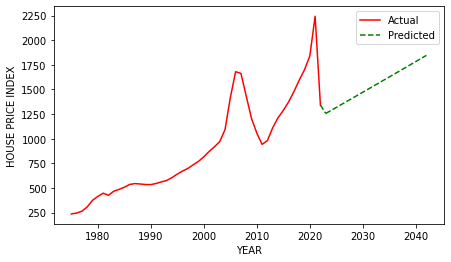

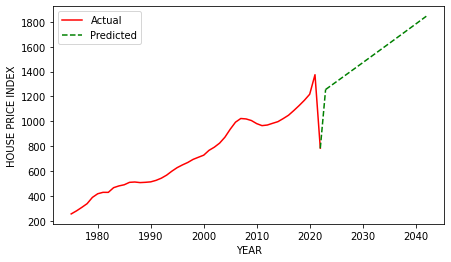

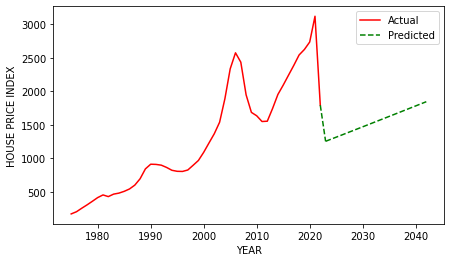

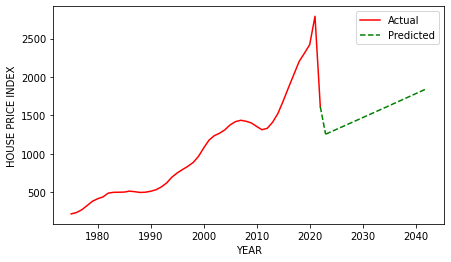

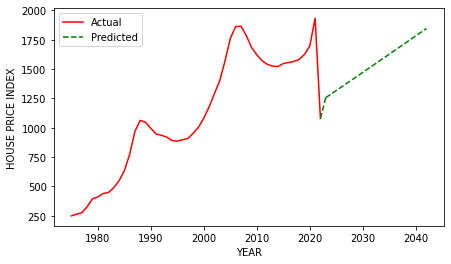

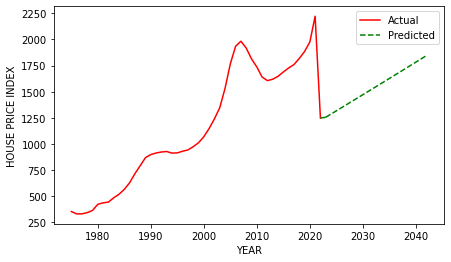

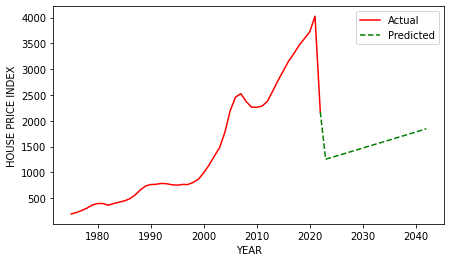

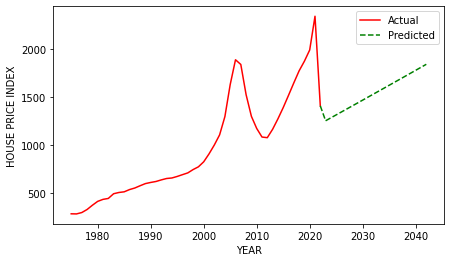

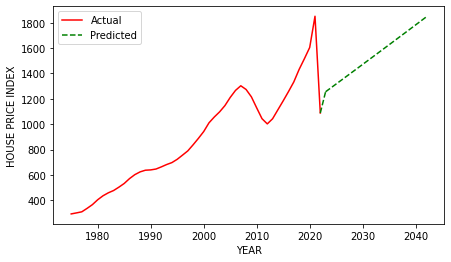

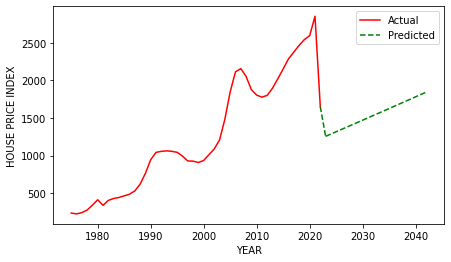

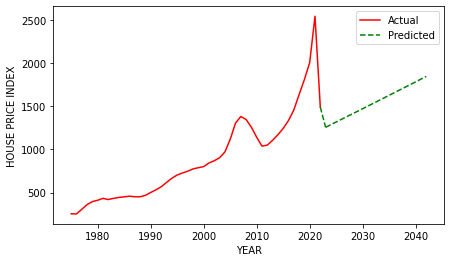

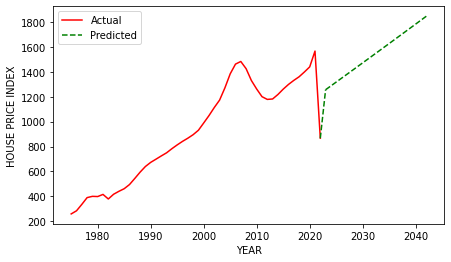

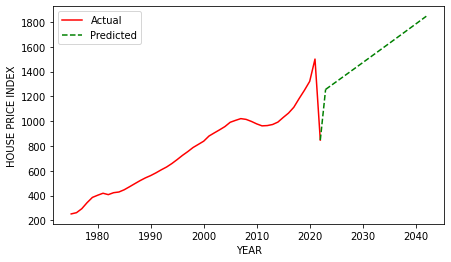

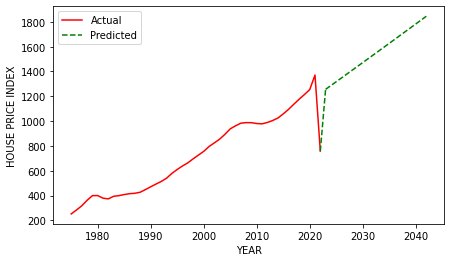

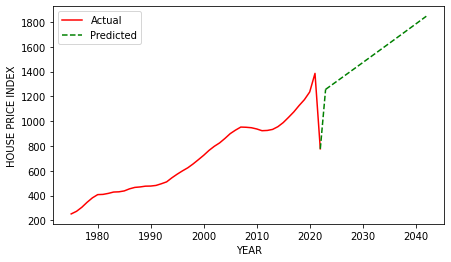

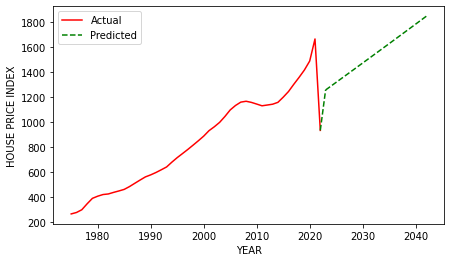

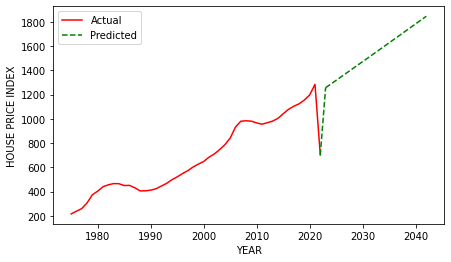

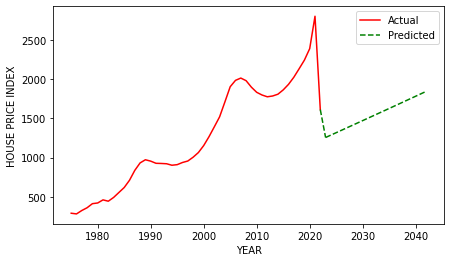

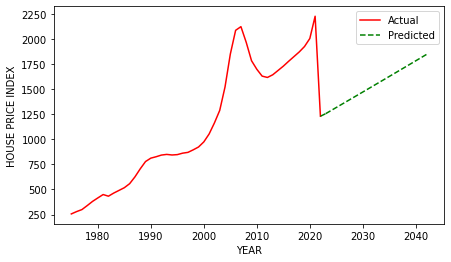

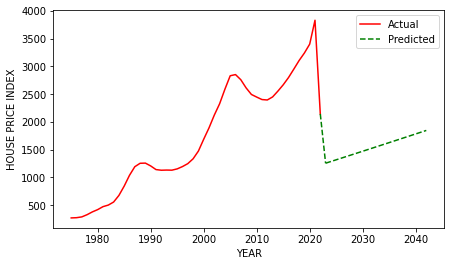

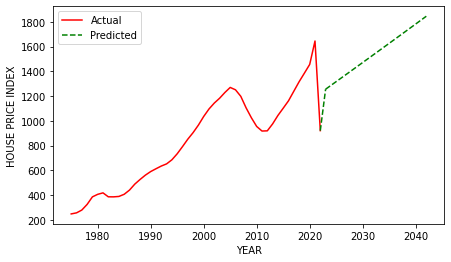

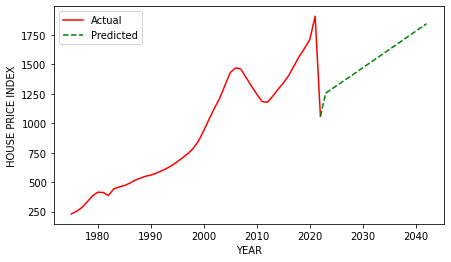

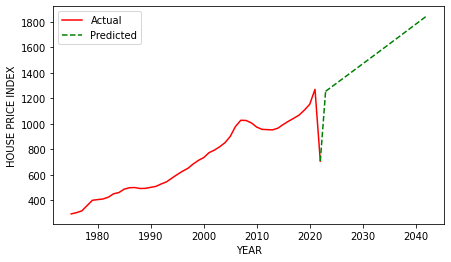

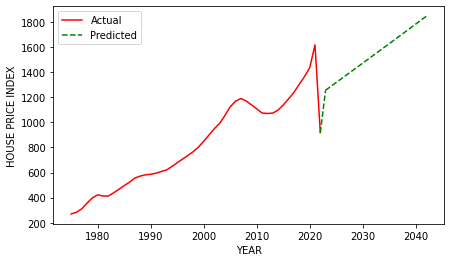

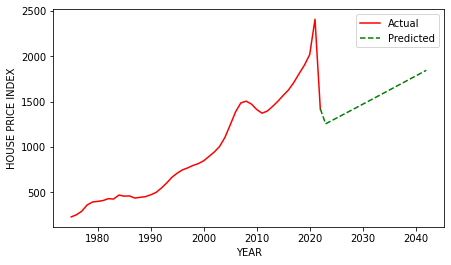

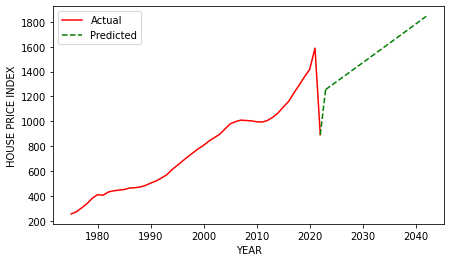

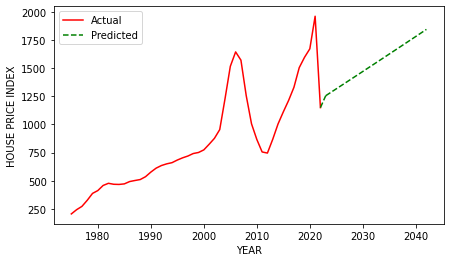

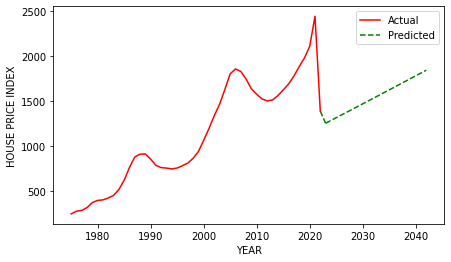

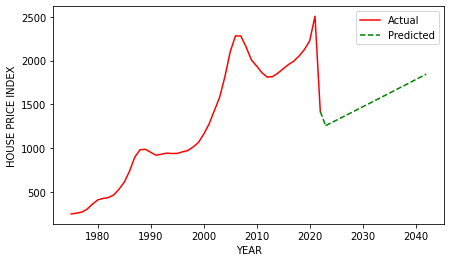

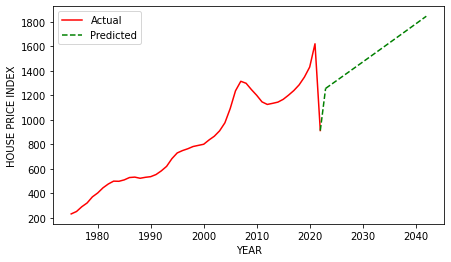

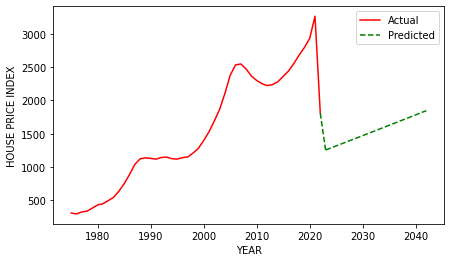

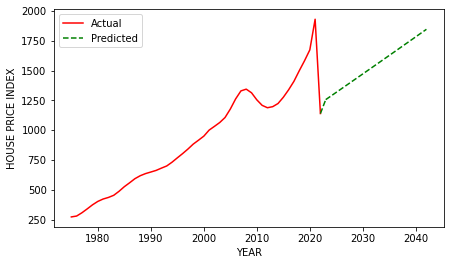

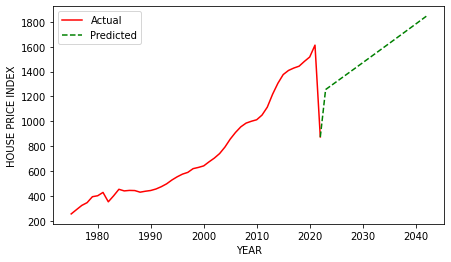

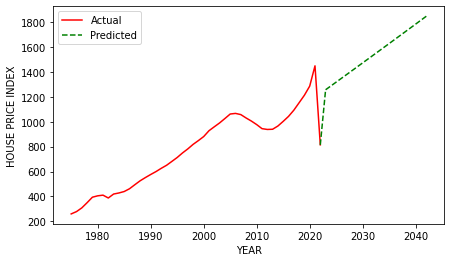

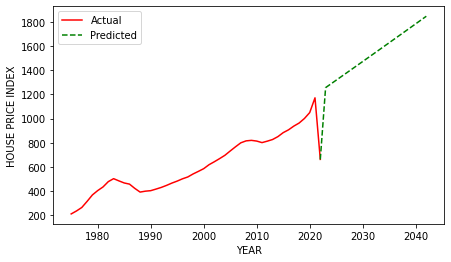

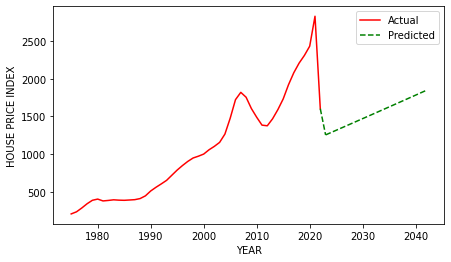

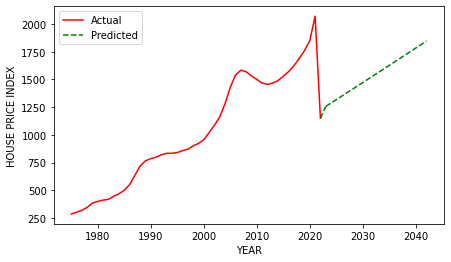

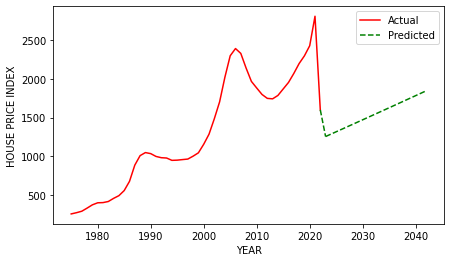

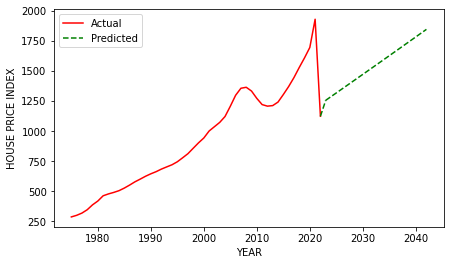

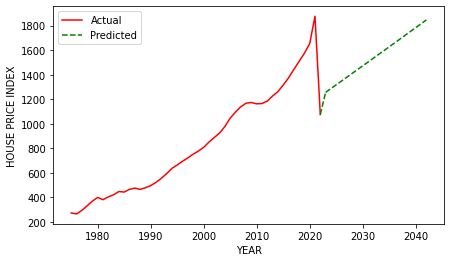

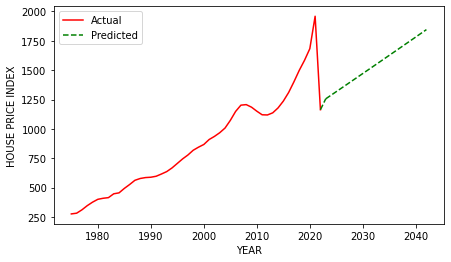

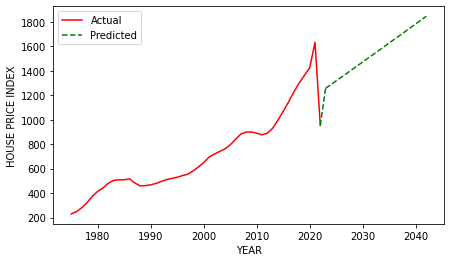

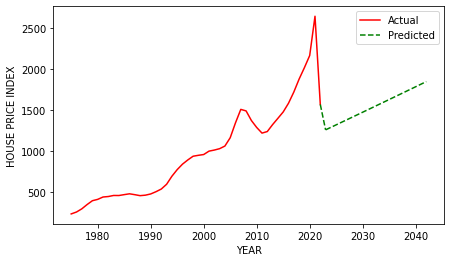

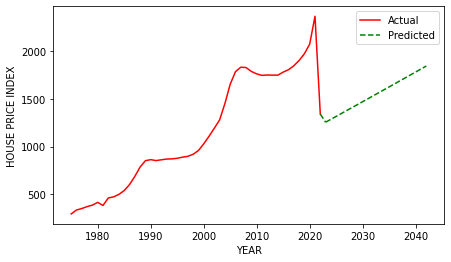

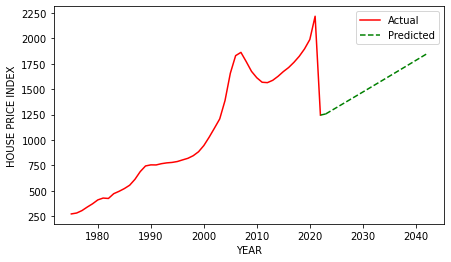

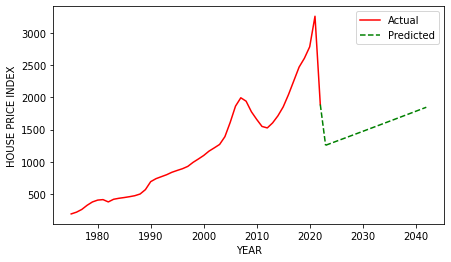

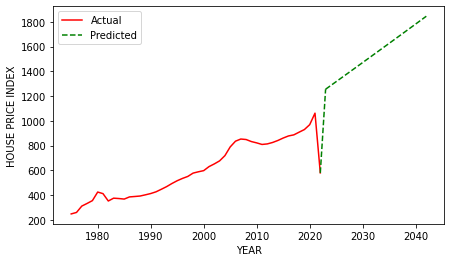

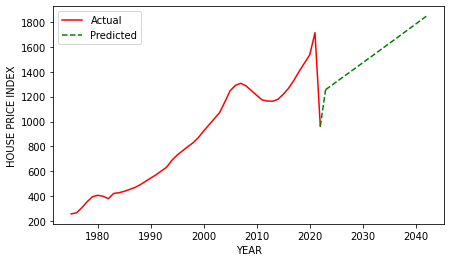

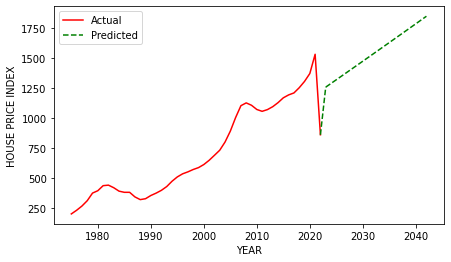

In [51]:
for state_id in tqdm(range(0, 51)):
    trad = state_dataset[(state_dataset['state'] == state_id) & (state_dataset['type'] == 1) & (state_dataset['flavor'] == 0)]
    future = []
    for i in range(2023, 2043):
        year = []
        year.append(1)
        year.append(1)
        year.append(25)
        year.append(i)
        future.append(year)
    future = pd.DataFrame(future, columns=['type', 'flavor', 'state', 'year'])
    poly_pred = poly.transform(future)
    future_pred = clf.predict(poly_pred)
    c = pd.DataFrame(columns=['year', 'index'])
    c['year'] = (range(2022, 2024))
    c['index'] =[trad.iloc[-1]['index'], future_pred[0]]
    figure = plt.figure(figsize=(7, 4))
    sns.lineplot(x=trad['year'], y=trad['index'], color='red', label='Actual')
    sns.lineplot(x=c['year'], y=c['index'], color='green',linestyle='dashed')
    sns.lineplot(x=future['year'],y=future_pred, color='green', linestyle='dashed', label='Predicted')
    plt.ylabel('HOUSE PRICE INDEX')
    plt.xlabel('YEAR')
    state_name = get_key(state_id, heading["ID"])
    plt.savefig('./Prediction Figures/' + state_name + '_traditional_all-transactions' + '.png')
    